# Project 5: Application - Twitter data #
## Part 5: Nonlinear regressions ##

### Question 11 Neural network for the whole dataset ###

In [1]:
# NOTE: http://pytz.sourceforge.net/
import pytz
# NOTE: https://www.w3schools.com/python/python_json.asp
import json
# NOTE: https://docs.python.org/3/library/datetime.html
import datetime
import numpy as np
import pandas as pd
import os
# os.chdir("ECE219_tweet_data/")

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

cv_n_jobs = 3

In [2]:
# load files and report for Part 3
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p5_20(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name

    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    tot_num_tweets = date_df['num_tweets'].resample('H').sum()
    tot_num_followers = date_df['num_followers'].resample('H').sum()
    max_num_followers = date_df['num_followers'].resample('H').max()
    tot_num_retweets = date_df['num_retweets'].resample('H').sum()
    tot_num_replies = date_df['num_replies'].resample('H').sum()
    max_num_replies = date_df['num_replies'].resample('H').max()
    tot_num_impressions = date_df['num_impressions'].resample('H').sum()
    max_num_impressions = date_df['num_impressions'].resample('H').max()
    tot_num_favourites = date_df['num_favourites'].resample('H').sum()
    max_num_favourites = date_df['num_favourites'].resample('H').max()
    tot_rank_score = date_df['rank_score'].resample('H').sum()
    max_rank_score = date_df['rank_score'].resample('H').max()
    tot_count_hashtag = date_df['count_hashtag'].resample('H').sum()
    max_count_hashtag = date_df['count_hashtag'].resample('H').max()
    tot_mention_counts = date_df['mention_counts'].resample('H').sum()
    max_mention_counts = date_df['mention_counts'].resample('H').max()
    tot_url_counts = date_df['url_counts'].resample('H').sum()
    max_url_counts = date_df['url_counts'].resample('H').max()
    tot_author_name = date_df['author_name'].resample('H').apply(lambda x: len(x.unique()))
    # rename each feature
    tot_num_tweets.rename('tot_num_tweets',inplace=True)
    tot_num_followers.rename('tot_num_followers',inplace=True)
    max_num_followers.rename('max_num_followers',inplace=True)
    tot_num_retweets.rename('tot_num_retweets',inplace=True)
    tot_num_replies.rename('tot_num_replies',inplace=True)
    max_num_replies.rename('max_num_replies',inplace=True)
    tot_num_impressions.rename('tot_num_impressions',inplace=True)
    max_num_impressions.rename('max_num_impressions',inplace=True)
    tot_num_favourites.rename('tot_num_favourites',inplace=True)
    max_num_favourites.rename('max_num_favourites',inplace=True)
    tot_rank_score.rename('tot_rank_score',inplace=True)
    max_rank_score.rename('max_rank_score',inplace=True)
    tot_count_hashtag.rename('tot_count_hashtag',inplace=True)
    max_count_hashtag.rename('max_count_hashtag',inplace=True)
    tot_mention_counts.rename('tot_mention_counts',inplace=True)
    max_mention_counts.rename('max_mention_counts',inplace=True)
    tot_url_counts.rename('tot_url_counts',inplace=True)
    max_url_counts.rename('max_url_counts',inplace=True)
    tot_author_name.rename('tot_author_name',inplace=True)
    # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
    # concatenating features
    features = [tot_num_tweets,
               tot_num_followers, max_num_followers,
               tot_num_retweets,
               tot_num_replies, max_num_replies,
               tot_num_impressions, max_num_impressions,
               tot_num_favourites, max_num_favourites,
               tot_rank_score, max_rank_score,
               tot_count_hashtag, max_count_hashtag,
               tot_mention_counts, max_mention_counts,
               tot_url_counts, max_url_counts,
               tot_author_name]
    date_df_out = pd.concat(features, axis=1)
    date_df_out['time'] = date_df_out.index.hour
    return date_df_out

In [3]:
def plotPred(test_target, pred_target):
    line1 = np.linspace(0,np.max([test_target,pred_target]),10)
    #plt.figure(figsize=(8,6)) 
    plt.scatter(test_target,pred_target)
    plt.plot(line1, line1,'r--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

In [4]:
# using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

# Set Parameters
parameters_neural = {'hidden_layer_sizes': [400,500,600,700,800],
                    'activation':['identity', 'logistic', 'tanh', 'relu']
#                     'solver':['lbfgs', 'sgd', 'adam']
                    }

# parameters_neural = {'hidden_layer_sizes': [2]}

### Question 11. Test with original data ###

#### Aggregate data ####

In [6]:
# 'tweets_#gohawks.txt'
df1 = readfile_p5_20('tweets_#gohawks.txt')
# 'tweets_#gohawks.txt'
df2 = readfile_p5_20('tweets_#gopatriots.txt')
# 'tweets_#gohawks.txt'
df3 = readfile_p5_20('tweets_#nfl.txt')
# 'tweets_#gohawks.txt'
df4 = readfile_p5_20('tweets_#patriots.txt')
# 'tweets_#gohawks.txt'
df5 = readfile_p5_20('tweets_#sb49.txt')
# 'tweets_#gohawks.txt'
df6 = readfile_p5_20('tweets_#superbowl.txt')
frames = [df1, df2, df3, df4, df5, df6]
date_df_out = pd.concat(frames)
# print(date_df_out)
# print(df1.shape)
# print(df2.shape)
# print(df3.shape)
# print(df4.shape)
# print(df5.shape)
# print(df6.shape)
# print(date_df_out.shape)
del df1,df2,df3,df4,df5,df6

#### Do regression ####

In [10]:
X = date_df_out.iloc[:-1]
y = date_df_out['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

mlpr = GridSearchCV(MLPRegressor(), parameters_neural, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
mlpr.fit(X, y)
predictResult = mlpr.predict(X)


C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MSE: -20020257453580.83	with: {'activation': 'identity', 'hidden_layer_sizes': 400}
MSE: -9541895528652.87	with: {'activation': 'identity', 'hidden_layer_sizes': 500}
MSE: -1365902102785.92	with: {'activation': 'identity', 'hidden_layer_sizes': 600}
MSE: -3034002558972.01	with: {'activation': 'identity', 'hidden_layer_sizes': 700}
MSE: -279445487032.51	with: {'activation': 'identity', 'hidden_layer_sizes': 800}
MSE: -61537682.68	with: {'activation': 'logistic', 'hidden_layer_sizes': 400}
MSE: -61518833.29	with: {'activation': 'logistic', 'hidden_layer_sizes': 500}
MSE: -61509529.37	with: {'activation': 'logistic', 'hidden_layer_sizes': 600}
MSE: -61500397.18	with: {'activation': 'logistic', 'hidden_layer_sizes': 700}
MSE: -61517876.42	with: {'activation': 'logistic', 'hidden_layer_sizes': 800}
MSE: -61533994.84	with: {'activation': 'tanh', 'hidden_layer_sizes': 400}
MSE: -61513141.94	with: {'activation': 'tanh', 'hidden_layer_sizes': 500}
MSE: -61489791.48	with: {'activation': 'tanh', 

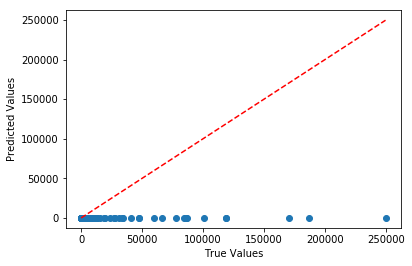

In [11]:
# Print result
# print(["%.6f" % x for x in mlpr.cv_results_[r'mean_test_score']])
means = mlpr.cv_results_['mean_test_score']
params = mlpr.cv_results_['params']
for mean, param in zip(means, params):
    print("MSE: %.2f\twith: %r" % (mean, param))
    
print('Best MSE is: ',mlpr.best_score_ )
print('Best Parameters are: ',mlpr.best_params_ )
plotPred(y,predictResult)

### Question 12. Test with standard data ###

In [13]:
from sklearn.preprocessing import StandardScaler

X = date_df_out.iloc[:-1]
y = date_df_out['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

mlpr = GridSearchCV(MLPRegressor(), parameters_neural, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
mlpr.fit(X, y)
predictResult = mlpr.predict(X)

C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE: -26631646.43	with: {'activation': 'identity', 'hidden_layer_sizes': 400}
MSE: -26974613.11	with: {'activation': 'identity', 'hidden_layer_sizes': 500}
MSE: -27548261.38	with: {'activation': 'identity', 'hidden_layer_sizes': 600}
MSE: -27570853.28	with: {'activation': 'identity', 'hidden_layer_sizes': 700}
MSE: -27865621.80	with: {'activation': 'identity', 'hidden_layer_sizes': 800}
MSE: -60704230.05	with: {'activation': 'logistic', 'hidden_layer_sizes': 400}
MSE: -60469614.31	with: {'activation': 'logistic', 'hidden_layer_sizes': 500}
MSE: -60237699.78	with: {'activation': 'logistic', 'hidden_layer_sizes': 600}
MSE: -60010317.11	with: {'activation': 'logistic', 'hidden_layer_sizes': 700}
MSE: -59796881.08	with: {'activation': 'logistic', 'hidden_layer_sizes': 800}
MSE: -60669668.31	with: {'activation': 'tanh', 'hidden_layer_sizes': 400}
MSE: -60427998.86	with: {'activation': 'tanh', 'hidden_layer_sizes': 500}
MSE: -60190197.29	with: {'activation': 'tanh', 'hidden_layer_sizes': 600

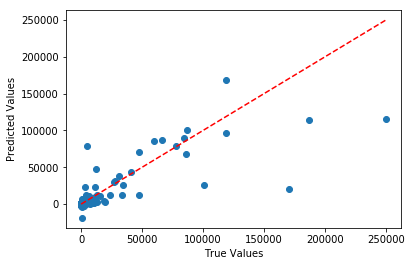

In [14]:
# Print result
# print(["%.6f" % x for x in mlpr.cv_results_[r'mean_test_score']])
means = mlpr.cv_results_['mean_test_score']
params = mlpr.cv_results_['params']
for mean, param in zip(means, params):
    print("MSE: %.2f\twith: %r" % (mean, param))
    
print('Best MSE is: ',mlpr.best_score_ )
print('Best Parameters are: ',mlpr.best_params_ )
plotPred(y,predictResult)

### Question 13 Test with time windows ###

In [5]:
# load files and report for Part 3
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p5_20_win(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name

    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    
    # create three dataset
    time_1 = '2015-02-01 08:00:00'
    time_2 = '2015-02-01 20:00:00'
    date_df_out_window = []
    for timeIndex in range(3):
        if (timeIndex == 0):
            # dataset before 2/1 8:00am IN 1h (H)
            date_df_in = date_df.iloc[date_df.index<time_1,:]
            windowT = 'H'
        elif (timeIndex == 2):
            # dataset after 2/1 8:00pm IN 1h (H)
            date_df_in = date_df.iloc[date_df.index>time_2,:]
            windowT = 'H'
        elif (timeIndex == 1):
            # dataset between 2/1 8:00am - 8:00pm IN 5min (5T)
            date_df_in = date_df.iloc[date_df.index>=time_1,:]
            date_df_in = date_df_in.iloc[date_df_in.index<=time_2,:]
            windowT = '5T'
        else:
            print('Invalid index.')
            
        tot_num_tweets = date_df_in['num_tweets'].resample(windowT).sum()
        tot_num_followers = date_df_in['num_followers'].resample(windowT).sum()
        max_num_followers = date_df_in['num_followers'].resample(windowT).max()
        tot_num_retweets = date_df_in['num_retweets'].resample(windowT).sum()
        tot_num_replies = date_df_in['num_replies'].resample(windowT).sum()
        max_num_replies = date_df_in['num_replies'].resample(windowT).max()
        tot_num_impressions = date_df_in['num_impressions'].resample(windowT).sum()
        max_num_impressions = date_df_in['num_impressions'].resample(windowT).max()
        tot_num_favourites = date_df_in['num_favourites'].resample(windowT).sum()
        max_num_favourites = date_df_in['num_favourites'].resample(windowT).max()
        tot_rank_score = date_df_in['rank_score'].resample(windowT).sum()
        max_rank_score = date_df_in['rank_score'].resample(windowT).max()
        tot_count_hashtag = date_df_in['count_hashtag'].resample(windowT).sum()
        max_count_hashtag = date_df_in['count_hashtag'].resample(windowT).max()
        tot_mention_counts = date_df_in['mention_counts'].resample(windowT).sum()
        max_mention_counts = date_df_in['mention_counts'].resample(windowT).max()
        tot_url_counts = date_df_in['url_counts'].resample(windowT).sum()
        max_url_counts = date_df_in['url_counts'].resample(windowT).max()
        tot_author_name = date_df_in['author_name'].resample(windowT).apply(lambda x: len(x.unique()))
        # rename each feature
        tot_num_tweets.rename('tot_num_tweets',inplace=True)
        tot_num_followers.rename('tot_num_followers',inplace=True)
        max_num_followers.rename('max_num_followers',inplace=True)
        tot_num_retweets.rename('tot_num_retweets',inplace=True)
        tot_num_replies.rename('tot_num_replies',inplace=True)
        max_num_replies.rename('max_num_replies',inplace=True)
        tot_num_impressions.rename('tot_num_impressions',inplace=True)
        max_num_impressions.rename('max_num_impressions',inplace=True)
        tot_num_favourites.rename('tot_num_favourites',inplace=True)
        max_num_favourites.rename('max_num_favourites',inplace=True)
        tot_rank_score.rename('tot_rank_score',inplace=True)
        max_rank_score.rename('max_rank_score',inplace=True)
        tot_count_hashtag.rename('tot_count_hashtag',inplace=True)
        max_count_hashtag.rename('max_count_hashtag',inplace=True)
        tot_mention_counts.rename('tot_mention_counts',inplace=True)
        max_mention_counts.rename('max_mention_counts',inplace=True)
        tot_url_counts.rename('tot_url_counts',inplace=True)
        max_url_counts.rename('max_url_counts',inplace=True)
        tot_author_name.rename('tot_author_name',inplace=True)
        # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
        # concatenating features
        features = [tot_num_tweets,
                   tot_num_followers, max_num_followers,
                   tot_num_retweets,
                   tot_num_replies, max_num_replies,
                   tot_num_impressions, max_num_impressions,
                   tot_num_favourites, max_num_favourites,
                   tot_rank_score, max_rank_score,
                   tot_count_hashtag, max_count_hashtag,
                   tot_mention_counts, max_mention_counts,
                   tot_url_counts, max_url_counts,
                   tot_author_name]
        date_df_out = pd.concat(features, axis=1)
        date_df_out['time'] = date_df_out.index.hour
        date_df_out_window.append(date_df_out)
    return date_df_out_window

In [6]:
windowTitles = ['Dataset before 2/1 8:00am in 1h','Dataset between 2/1 8:00am - 8:00pm in 5min','Dataset after 2/1 8:00pm in 1h']

#### Aggregate data ####

In [7]:
# 'tweets_#gohawks.txt'
df1 = readfile_p5_20_win('tweets_#gohawks.txt')
# 'tweets_#gohawks.txt'
df2 = readfile_p5_20_win('tweets_#gopatriots.txt')
# 'tweets_#gohawks.txt'
df3 = readfile_p5_20_win('tweets_#nfl.txt')
# 'tweets_#gohawks.txt'
df4 = readfile_p5_20_win('tweets_#patriots.txt')
# 'tweets_#gohawks.txt'
df5 = readfile_p5_20_win('tweets_#sb49.txt')
# 'tweets_#gohawks.txt'
df6 = readfile_p5_20_win('tweets_#superbowl.txt')
frames = [df1, df2, df3, df4, df5, df6]
date_df_out_win = []
frames0 = [df1[0], df2[0], df3[0], df4[0], df5[0], df6[0]]
date_df_out_win0 = pd.concat(frames0)
frames1 = [df1[1], df2[1], df3[1], df4[1], df5[1], df6[1]]
date_df_out_win1 = pd.concat(frames1)
frames2 = [df1[2], df2[2], df3[2], df4[2], df5[2], df6[2]]
date_df_out_win2 = pd.concat(frames2)

date_df_out_win.append(date_df_out_win0)
date_df_out_win.append(date_df_out_win1)
date_df_out_win.append(date_df_out_win2)

# print(date_df_out_win[0])
# print(date_df_out_win[1])
# print(date_df_out_win[2])
# print(df1[0].shape)
# print(df2[0].shape)
# print(df3[0].shape)
# print(df4[0].shape)
# print(df5[0].shape)
# print(df6[0].shape)
# print(date_df_out_win[0].shape)
# print(date_df_out_win[1].shape)
# print(date_df_out_win[2].shape)
del df1,df2,df3,df4,df5,df6

#### Do regression ####

C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE: -340959.66	with: {'activation': 'identity', 'hidden_layer_sizes': 400}
MSE: -341513.12	with: {'activation': 'identity', 'hidden_layer_sizes': 500}
MSE: -342318.74	with: {'activation': 'identity', 'hidden_layer_sizes': 600}
MSE: -345106.97	with: {'activation': 'identity', 'hidden_layer_sizes': 700}
MSE: -342855.09	with: {'activation': 'identity', 'hidden_layer_sizes': 800}
MSE: -404304.51	with: {'activation': 'logistic', 'hidden_layer_sizes': 400}
MSE: -390228.46	with: {'activation': 'logistic', 'hidden_layer_sizes': 500}
MSE: -378736.32	with: {'activation': 'logistic', 'hidden_layer_sizes': 600}
MSE: -369073.53	with: {'activation': 'logistic', 'hidden_layer_sizes': 700}
MSE: -360985.97	with: {'activation': 'logistic', 'hidden_layer_sizes': 800}
MSE: -397906.42	with: {'activation': 'tanh', 'hidden_layer_sizes': 400}
MSE: -382854.91	with: {'activation': 'tanh', 'hidden_layer_sizes': 500}
MSE: -370381.42	with: {'activation': 'tanh', 'hidden_layer_sizes': 600}
MSE: -359468.53	with: {'

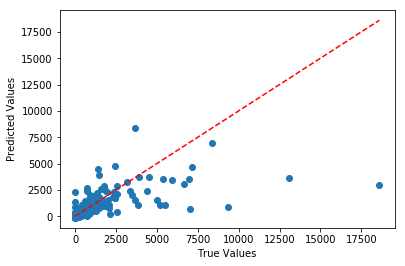

C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MSE: -7225042.56	with: {'activation': 'identity', 'hidden_layer_sizes': 400}
MSE: -6773898.72	with: {'activation': 'identity', 'hidden_layer_sizes': 500}
MSE: -6416771.89	with: {'activation': 'identity', 'hidden_layer_sizes': 600}
MSE: -6076454.44	with: {'activation': 'identity', 'hidden_layer_sizes': 700}
MSE: -5809830.45	with: {'activation': 'identity', 'hidden_layer_sizes': 800}
MSE: -21896745.76	with: {'activation': 'logistic', 'hidden_layer_sizes': 400}
MSE: -21568602.39	with: {'activation': 'logistic', 'hidden_layer_sizes': 500}
MSE: -21249248.07	with: {'activation': 'logistic', 'hidden_layer_sizes': 600}
MSE: -20933058.59	with: {'activation': 'logistic', 'hidden_layer_sizes': 700}
MSE: -20628951.47	with: {'activation': 'logistic', 'hidden_layer_sizes': 800}
MSE: -21844696.88	with: {'activation': 'tanh', 'hidden_layer_sizes': 400}
MSE: -21508325.64	with: {'activation': 'tanh', 'hidden_layer_sizes': 500}
MSE: -21179985.32	with: {'activation': 'tanh', 'hidden_layer_sizes': 600}
MSE

C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


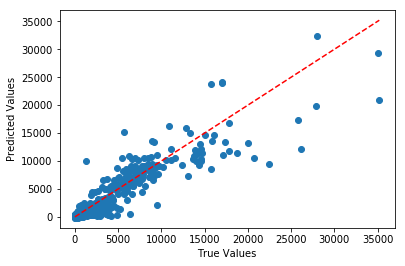

MSE: -174985.67	with: {'activation': 'identity', 'hidden_layer_sizes': 400}
MSE: -177194.98	with: {'activation': 'identity', 'hidden_layer_sizes': 500}
MSE: -172891.26	with: {'activation': 'identity', 'hidden_layer_sizes': 600}
MSE: -175975.19	with: {'activation': 'identity', 'hidden_layer_sizes': 700}
MSE: -178069.64	with: {'activation': 'identity', 'hidden_layer_sizes': 800}
MSE: -326306.03	with: {'activation': 'logistic', 'hidden_layer_sizes': 400}
MSE: -306259.27	with: {'activation': 'logistic', 'hidden_layer_sizes': 500}
MSE: -289509.27	with: {'activation': 'logistic', 'hidden_layer_sizes': 600}
MSE: -275345.03	with: {'activation': 'logistic', 'hidden_layer_sizes': 700}
MSE: -263548.15	with: {'activation': 'logistic', 'hidden_layer_sizes': 800}
MSE: -318102.59	with: {'activation': 'tanh', 'hidden_layer_sizes': 400}
MSE: -296303.91	with: {'activation': 'tanh', 'hidden_layer_sizes': 500}
MSE: -278540.72	with: {'activation': 'tanh', 'hidden_layer_sizes': 600}
MSE: -262909.38	with: {'

C:\Users\xmliu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


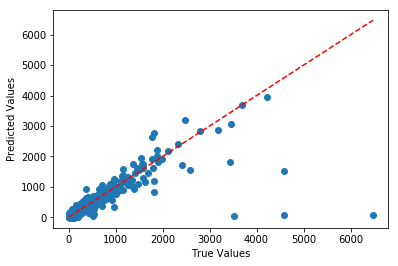

In [8]:
from sklearn.preprocessing import StandardScaler

for i in range(3):
    X = date_df_out_win[i].iloc[:-1]
    y = date_df_out_win[i]['tot_num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    mlpr = GridSearchCV(MLPRegressor(), parameters_neural, n_jobs=cv_n_jobs, cv = KFold(5, shuffle=True), scoring='neg_mean_squared_error')
    mlpr.fit(X, y)
    predictResult = mlpr.predict(X)

    # Print result
    # print(["%.6f" % x for x in rfr.cv_results_[r'mean_test_score']])
    means = mlpr.cv_results_['mean_test_score']
    params = mlpr.cv_results_['params']
    for mean, param in zip(means, params):
        print("MSE: %.2f\twith: %r" % (mean, param))

    print('Best MSE is: ',mlpr.best_score_ )
    print('Best Parameters are: ',mlpr.best_params_ )
    plotPred(y,predictResult)

## Part 6. Using 6x window to predict ##
### Question 14. Test on 6 windows ###

In [8]:
# Read test data in 1h
def readfile_p6_test_1h(file_name):
    # Read file ##########################################################
    time_list = []
    
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    
    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets
    tot_num_tweets = date_df['num_tweets'].resample('H').sum()

    # rename each feature
    tot_num_tweets.rename('tot_num_tweets',inplace=True)

    # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
    # concatenating features
    features = [tot_num_tweets]
    date_df_out = pd.concat(features, axis=1)
    date_df_out['time'] = date_df_out.index.hour
    return date_df_out

In [9]:
# load files and report for Part 3
from sklearn.metrics import r2_score, mean_squared_error

def readfile_p5_20_5min(file_name):
    # Read file ##########################################################
    time_list = []
    num_retweets = []
    num_followers = []
    num_replies = []
    num_impressions = []
    num_favourites = []
    rank_score = []
    count_hashtag = []
    mention_counts = []
    url_counts = []
    author_name = []
    with open(file_name,encoding='utf8') as file:
        data = file.readlines()
    for line in data:
        json_object = json.loads(line)
        time_list.append(json_object['citation_date'])
        num_retweets.append(json_object['metrics']['citations']['total'])
        num_followers.append(json_object['author']['followers'])
        # addtional features: 
        #   impressions, favourites, ranking score, counted hashtag, 
        #   mentioned count, url counts, author_name
        num_replies.append(json_object['metrics']['citations']['replies'])
        num_impressions.append(json_object['metrics']['impressions'])
        num_favourites.append(json_object['tweet']['favorite_count'])
        rank_score.append(json_object['metrics']['ranking_score'])
        count_hashtag.append(json_object['title'].count('#'))
        mention_counts.append(len(json_object['tweet']['entities']['user_mentions']))
        url_counts.append(len(json_object['tweet']['entities']['urls']))
        author_name.append(json_object['author']['name'])
    file.close()

    # Process datetime for event counting #################################
    # NOTE: https://stackoverflow.com/questions/28564254/count-number-of-events-per-hour-given-in-datetime-numpy
    date_list = []
    pst_tz = pytz.timezone('America/Los_Angeles')
    for time in time_list:
        date = datetime.datetime.fromtimestamp(time,pst_tz).replace(tzinfo=None)
        date_list.append(date)
    # count events per hour using dataframe
    date_df = pd.DataFrame(date_list,columns=['Date'])
    date_df = date_df.set_index(date_df['Date'])
    date_df.drop(['Date'],1,inplace = True)
    date_df['num_tweets'] = 1
    date_df['num_followers'] = num_followers
    date_df['num_retweets'] = num_retweets
    # additional features
    date_df['num_replies'] = num_replies
    date_df['num_impressions'] = num_impressions
    date_df['num_favourites'] = num_favourites
    date_df['rank_score'] = rank_score
    date_df['count_hashtag'] = count_hashtag
    date_df['mention_counts'] = mention_counts
    date_df['url_counts'] = url_counts
    date_df['author_name'] = author_name

    # NOTE: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.apply.html
    # count events per feature
    # features: 
    #   total number of tweets, 
    #   total number of followers, max number of followers, 
    #   total number of retweets,
    #   total number of replies, max number of replies, 
    #   total number of impressions, max number of impressions,
    #   total number of favourites, max number of favourites,
    #   sum of rank scores, max rank scores,
    #   sum of counted hashtag, max counted hashtage
    #   sum of mentioned counts, max mentioned counts
    #   sum of url counts, max url counts
    #   total number of authors, max number of authors
    tot_num_tweets = date_df['num_tweets'].resample('5T').sum()
    tot_num_followers = date_df['num_followers'].resample('5T').sum()
    max_num_followers = date_df['num_followers'].resample('5T').max()
    tot_num_retweets = date_df['num_retweets'].resample('5T').sum()
    tot_num_replies = date_df['num_replies'].resample('5T').sum()
    max_num_replies = date_df['num_replies'].resample('5T').max()
    tot_num_impressions = date_df['num_impressions'].resample('5T').sum()
    max_num_impressions = date_df['num_impressions'].resample('5T').max()
    tot_num_favourites = date_df['num_favourites'].resample('5T').sum()
    max_num_favourites = date_df['num_favourites'].resample('5T').max()
    tot_rank_score = date_df['rank_score'].resample('5T').sum()
    max_rank_score = date_df['rank_score'].resample('5T').max()
    tot_count_hashtag = date_df['count_hashtag'].resample('5T').sum()
    max_count_hashtag = date_df['count_hashtag'].resample('5T').max()
    tot_mention_counts = date_df['mention_counts'].resample('5T').sum()
    max_mention_counts = date_df['mention_counts'].resample('5T').max()
    tot_url_counts = date_df['url_counts'].resample('5T').sum()
    max_url_counts = date_df['url_counts'].resample('5T').max()
    tot_author_name = date_df['author_name'].resample('5T').apply(lambda x: len(x.unique()))
    # rename each feature
    tot_num_tweets.rename('tot_num_tweets',inplace=True)
    tot_num_followers.rename('tot_num_followers',inplace=True)
    max_num_followers.rename('max_num_followers',inplace=True)
    tot_num_retweets.rename('tot_num_retweets',inplace=True)
    tot_num_replies.rename('tot_num_replies',inplace=True)
    max_num_replies.rename('max_num_replies',inplace=True)
    tot_num_impressions.rename('tot_num_impressions',inplace=True)
    max_num_impressions.rename('max_num_impressions',inplace=True)
    tot_num_favourites.rename('tot_num_favourites',inplace=True)
    max_num_favourites.rename('max_num_favourites',inplace=True)
    tot_rank_score.rename('tot_rank_score',inplace=True)
    max_rank_score.rename('max_rank_score',inplace=True)
    tot_count_hashtag.rename('tot_count_hashtag',inplace=True)
    max_count_hashtag.rename('max_count_hashtag',inplace=True)
    tot_mention_counts.rename('tot_mention_counts',inplace=True)
    max_mention_counts.rename('max_mention_counts',inplace=True)
    tot_url_counts.rename('tot_url_counts',inplace=True)
    max_url_counts.rename('max_url_counts',inplace=True)
    tot_author_name.rename('tot_author_name',inplace=True)
    # NOTE: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
    # concatenating features
    features = [tot_num_tweets,
               tot_num_followers, max_num_followers,
               tot_num_retweets,
               tot_num_replies, max_num_replies,
               tot_num_impressions, max_num_impressions,
               tot_num_favourites, max_num_favourites,
               tot_rank_score, max_rank_score,
               tot_count_hashtag, max_count_hashtag,
               tot_mention_counts, max_mention_counts,
               tot_url_counts, max_url_counts,
               tot_author_name]
    date_df_out = pd.concat(features, axis=1)
    date_df_out['time'] = date_df_out.index.hour
    return date_df_out

#### Load test data ####

In [10]:
date_test_s0_p1 = readfile_p5_20('sample0_period1.txt')
date_test_s0_p2 = readfile_p5_20_5min('sample0_period2.txt')
date_test_s0_p3 = readfile_p5_20('sample0_period3.txt')

date_test_s1_p1 = readfile_p5_20('sample1_period1.txt')
date_test_s1_p2 = readfile_p5_20_5min('sample1_period2.txt')
date_test_s1_p3 = readfile_p5_20('sample1_period3.txt')

date_test_s2_p1 = readfile_p5_20('sample2_period1.txt')
date_test_s2_p2 = readfile_p5_20_5min('sample2_period2.txt')
date_test_s2_p3 = readfile_p5_20('sample2_period3.txt')

#### Train & test model for each window####

#### Gradient Boosting Regressor #### 

Result for  date_test_s0_p1
Next prediction is:  [ 60.82368031 123.42009616 137.08708378 114.60319437 105.52351661
 102.59239427]
MSE_pre:  552.4959151456054


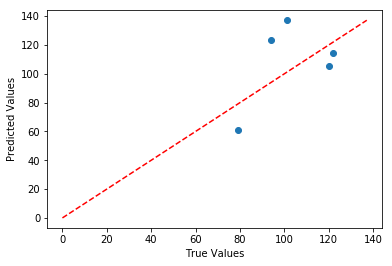

Result for  date_test_s1_p1
Next prediction is:  [201.21925445 202.54497619 286.84247718 459.3611491  604.18340912
 838.87795831]
MSE_pre:  13624.767463855262


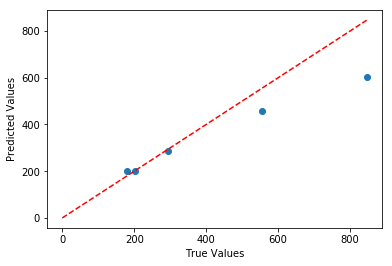

Result for  date_test_s2_p1
Next prediction is:  [403.06801277 173.58644864 117.67804709 128.16659942  96.60683933
  40.86268936]
MSE_pre:  15269.795937675799


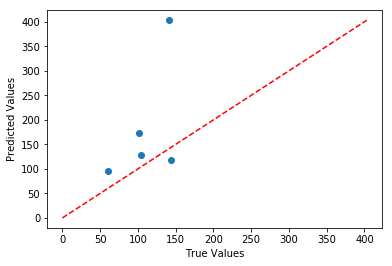

In [11]:
# window 1
from sklearn.ensemble import GradientBoostingRegressor

i = 0
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#  {'max_depth': 80, 'n_estimators': 400, 'min_samples_split': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4}
gbr = GradientBoostingRegressor(max_depth=80, n_estimators=400, min_samples_split=5, max_features='sqrt', min_samples_leaf=4)
gbr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = gbr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)
    

Result for  date_test_s0_p2
Next prediction is:  [2984.97208523 3939.49487873 1728.96181748 1136.20593264 1086.05141426
  775.68955443]
MSE_pre:  726890.7940807987


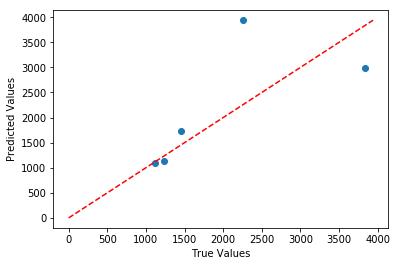

Result for  date_test_s1_p2
Next prediction is:  [2071.50336643 1606.07990387 1739.54542336 1524.6068107  1697.75659018
 1760.70616721]
MSE_pre:  676075.245348064


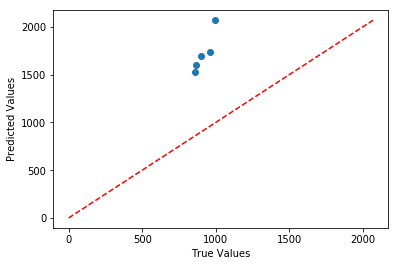

Result for  date_test_s2_p2
Next prediction is:  [104.75873876  23.83838392  28.68626305  47.0848105   95.01226279
  31.31037051]
MSE_pre:  2435.291568685695


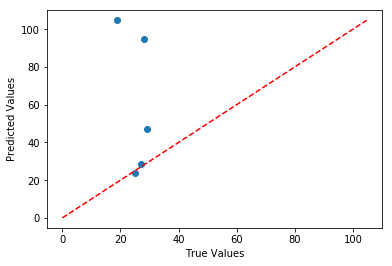

In [12]:
# window 2
i = 1
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#  {'max_depth': 200, 'n_estimators': 800, 'min_samples_split': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2}
gbr = GradientBoostingRegressor(max_depth=200, n_estimators=800, min_samples_split=5, max_features='sqrt', min_samples_leaf=2)
gbr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = gbr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)
    

Result for  date_test_s0_p3
Next prediction is:  [ 65.2564607   56.48294908  69.98629302  52.54502525  88.23294084
 103.90705612]
MSE_pre:  585.8390634371464


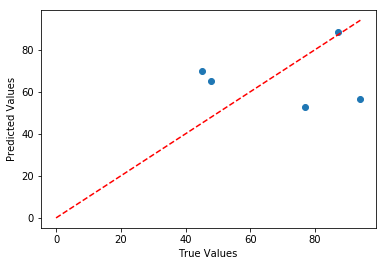

Result for  date_test_s1_p3
Next prediction is:  [52.40257238 92.8147525  37.17585389 25.1731881  47.08524046 50.533093  ]
MSE_pre:  827.5332320695674


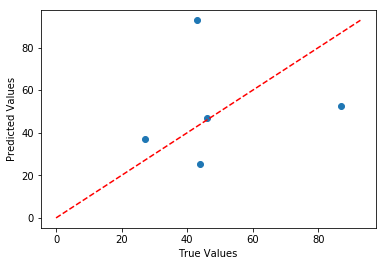

Result for  date_test_s2_p3
Next prediction is:  [ 75.65986997 100.54636551  47.2016411   52.40257238  92.8147525
  37.17585389]
MSE_pre:  1533.3195651598494


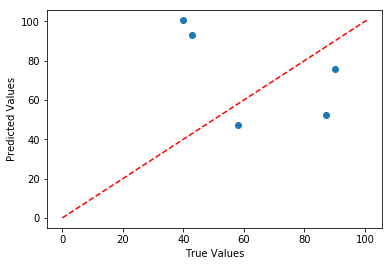

In [22]:
# window 3
i = 2
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#   {'max_depth': 60, 'n_estimators': 1800, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1}
gbr = GradientBoostingRegressor(max_depth=60, n_estimators=1800, min_samples_split=2, max_features='sqrt', min_samples_leaf=1)
gbr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = gbr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)
    

#### Random Forest Regressor ####

Result for  date_test_s0_p1
Next prediction is:  [ 83.94865476 126.31920563 143.39183797 131.11557183 142.02908297
 136.02757153]
MSE_pre:  686.8924618981622


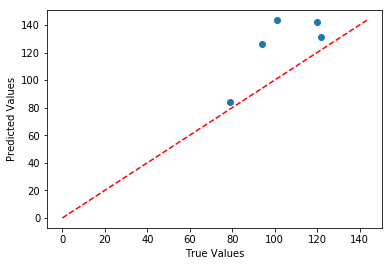

Result for  date_test_s1_p1
Next prediction is:  [ 236.44145636  211.7404083   244.22752071  369.50646876  517.40407296
 1065.94211889]
MSE_pre:  29628.189329109453


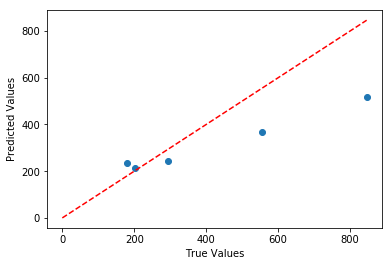

Result for  date_test_s2_p1
Next prediction is:  [388.6525034  155.98089645 115.80486826 133.40619466 101.99693859
  49.70181894]
MSE_pre:  13517.227666425548


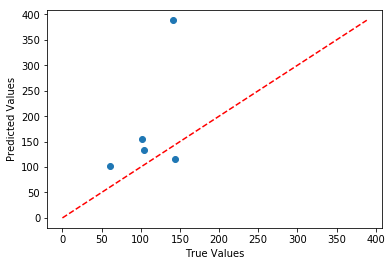

In [14]:
from sklearn.ensemble import RandomForestRegressor

# window 1
i = 0
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# {'max_depth': 200, 'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4}
rfr = RandomForestRegressor(max_depth=200, n_estimators=400, min_samples_split=2, max_features='sqrt', min_samples_leaf=4)
rfr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = rfr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)


Result for  date_test_s0_p2
Next prediction is:  [3052.19083716 3628.17380013 2097.48033838 1253.84161123 1182.13199978
 1367.07160365]
MSE_pre:  581046.8789165246


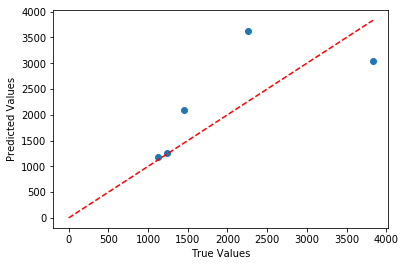

Result for  date_test_s1_p2
Next prediction is:  [1376.78756833 1420.79147531 1375.49905579 1367.16501018 1198.9411932
 1324.5653071 ]
MSE_pre:  193111.3338659432


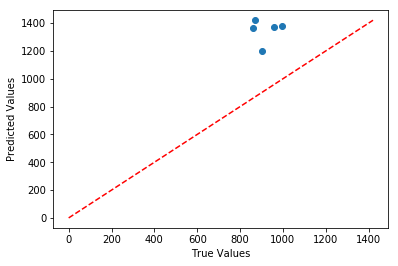

Result for  date_test_s2_p2
Next prediction is:  [58.39052708 22.77131462 33.17340685 43.5205536  51.11012087 46.70663127]
MSE_pre:  467.92315556747087


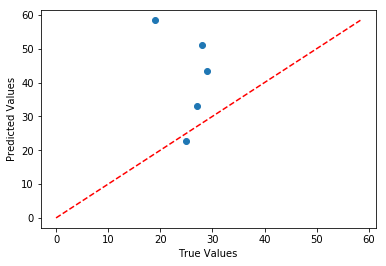

In [15]:
# window 2
i = 1
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#  {'max_depth': None, 'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4}
rfr = RandomForestRegressor(max_depth=None, n_estimators=200, min_samples_split=5, max_features='sqrt', min_samples_leaf=4)
rfr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = rfr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)


Result for  date_test_s0_p3
Next prediction is:  [ 91.90645536  58.5218943   80.20156548  73.00123115  93.89825611
 114.1856321 ]
MSE_pre:  897.8398215306146


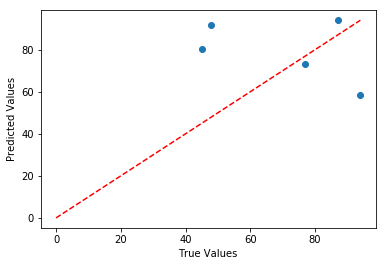

Result for  date_test_s1_p3
Next prediction is:  [71.80896429 90.99689683 82.88060119 59.63444444 95.56927282 67.61688727]
MSE_pre:  1671.7319842175543


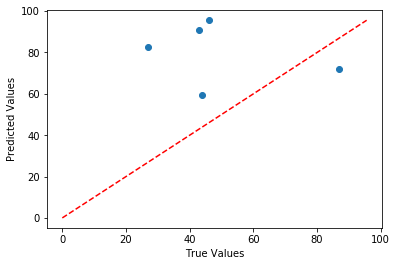

Result for  date_test_s2_p3
Next prediction is:  [ 76.68410913 110.41870437  80.91067857  71.80896429  90.99689683
  82.88060119]
MSE_pre:  1639.0951475484653


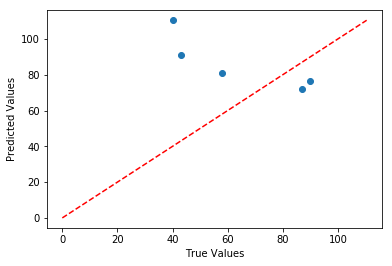

In [16]:
# window 3
i = 2
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#   {'max_depth': 60, 'n_estimators': 400, 'min_samples_split': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2}
rfr = RandomForestRegressor(max_depth=60, n_estimators=400, min_samples_split=2, max_features='sqrt', min_samples_leaf=2)
rfr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = rfr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)


#### MLP Regressor ####

Result for  date_test_s0_p1
Next prediction is:  [ 199.44173291 2875.92073286  266.50891704  867.59696092 -794.23125063
 9260.2095779 ]
MSE_pre:  1834543.196867831


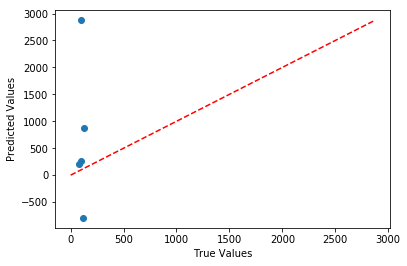

Result for  date_test_s1_p1
Next prediction is:  [  482.9513934   1556.01193323  3315.55329699    96.89339902
  1967.06313165 18172.86419581]
MSE_pre:  2504311.2783263056


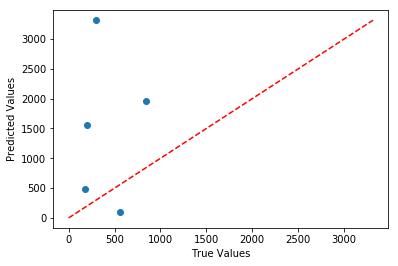

Result for  date_test_s2_p1
Next prediction is:  [6487.81892907 1072.31436486   76.3542471   139.77333868 1215.75544828
   51.40639519]
MSE_pre:  8512587.26200424


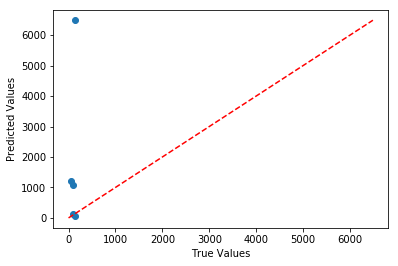

In [17]:
from sklearn.neural_network import MLPRegressor

# window 1
i = 0
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#  {'activation': 'relu', 'hidden_layer_sizes': 700}
mlpr = MLPRegressor(activation = 'relu', hidden_layer_sizes = 700)
mlpr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = mlpr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)


Result for  date_test_s0_p2
Next prediction is:  [ 1035.28244652 -1129.85069138  -360.61037325 -2955.05650722
  -109.01092708   408.31377596]
MSE_pre:  8336243.547371948


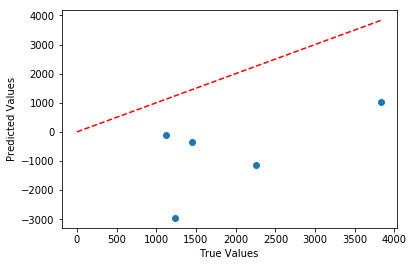

Result for  date_test_s1_p2
Next prediction is:  [1636.90915437  911.376333    408.12562736 1597.66237925 1029.95165794
  247.2445697 ]
MSE_pre:  255422.57420705614


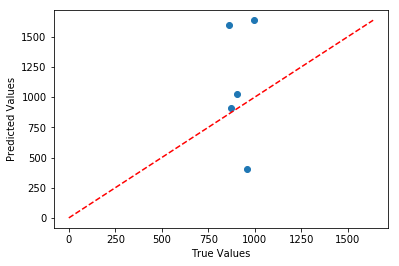

Result for  date_test_s2_p2
Next prediction is:  [  -68.00892009     4.60501453  -131.49794042  -843.99603315
   -21.71339176 -1595.56441475]
MSE_pre:  159540.31998766272


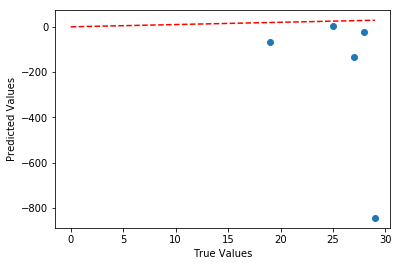

In [18]:
# window 2
i = 1
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#  {'activation': 'relu', 'hidden_layer_sizes': 800}
mlpr = MLPRegressor(activation = 'relu', hidden_layer_sizes = 800)
mlpr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = mlpr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)


Result for  date_test_s0_p3
Next prediction is:  [2341.59302065 -170.49640395  -81.3366026    13.58891688  285.53671327
  306.46249036]
MSE_pre:  1077985.204244841


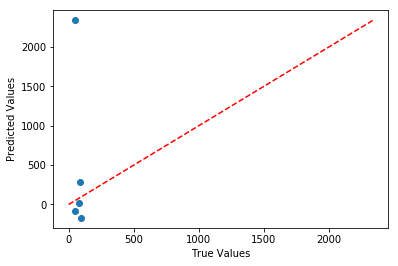

Result for  date_test_s1_p3
Next prediction is:  [7.44265567e+03 2.17972858e+03 1.12230873e+00 3.47562363e+01
 1.16503611e+02 2.97845008e+02]
MSE_pre:  11735401.048348319


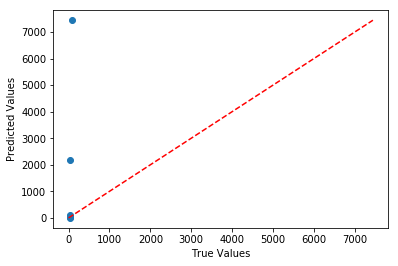

Result for  date_test_s2_p3
Next prediction is:  [ 4.47279591e+01 -7.41976591e+01  1.13542743e+02  7.44265567e+03
  2.17972858e+03  1.12230873e+00]
MSE_pre:  11737891.007970657


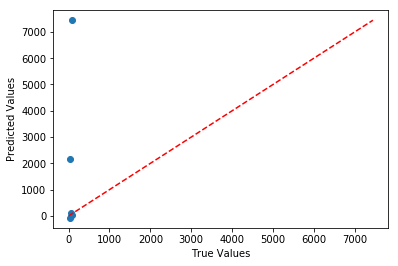

In [19]:
# window 3
i = 2
X = date_df_out_win[i].iloc[:-1]
y = date_df_out_win[i]['tot_num_tweets'][1:]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#   {'activation': 'relu', 'hidden_layer_sizes': 700}
mlpr = MLPRegressor(activation = 'relu', hidden_layer_sizes = 700)
mlpr.fit(X, y)

# test data
for k in range(3):
    j = i + 1
    file_name = 'date_test_s' + str(k) + '_p' + str(j)
    exec("X_test = %s" % file_name)
    exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
#         X_test = date_test_s0_p3
#         y_test = date_test_s0_p3['tot_num_tweets'][1:]
    X_test = np.nan_to_num(X_test)
    y_test = np.nan_to_num(y_test)

    predictResult = mlpr.predict(X_test)
#         print(predictResult)
    Next_result = predictResult
    predictResult = predictResult[:-1]
    MSE_pre = np.mean (np.square(predictResult - y_test))
    print('Result for ',file_name)
    print('Next prediction is: ',Next_result)
    print('MSE_pre: ', MSE_pre)
    plotPred(y_test,predictResult)


#### OLS ####

Result for  date_test_s0_p1
Next prediction is:  [ 67.77969956 168.94907381 266.01464294 248.81397093 259.2213635
 178.53443523]
MSE_pre:  13687.492493915517


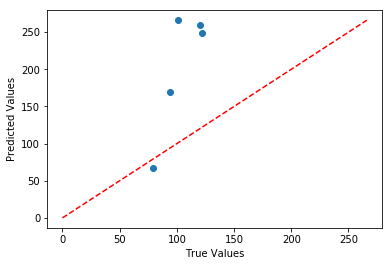

Result for  date_test_s1_p1
Next prediction is:  [ 422.03633119  223.37344418  300.76501066  465.57625552  600.43209523
 1109.38229471]
MSE_pre:  25476.87540675628


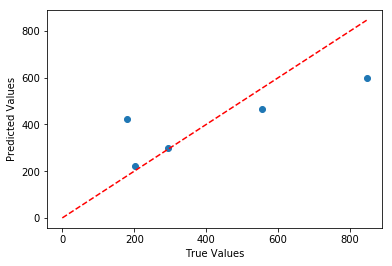

Result for  date_test_s2_p1
Next prediction is:  [423.19675854 243.04163216 170.80505606 100.77431696 112.63034411
 113.87704713]
MSE_pre:  20584.472205406593


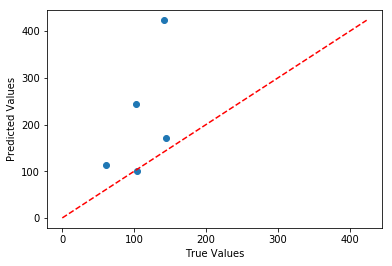

Result for  date_test_s0_p2
Next prediction is:  [4694.11872682 4391.57389155 2097.37394924 1467.73634923 1541.24387695
 1200.21942365]
MSE_pre:  1186736.0428894642


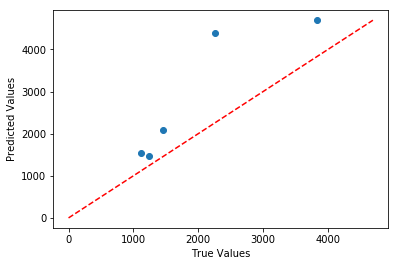

Result for  date_test_s1_p2
Next prediction is:  [1033.9341225  1297.79892676 1104.96580759 1035.51822648  967.24579866
 1018.1349925 ]
MSE_pre:  48025.40140365301


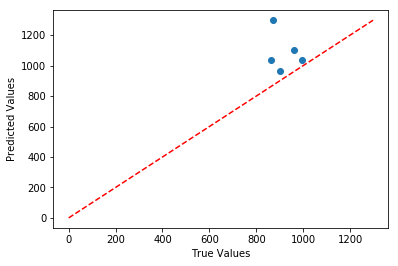

Result for  date_test_s2_p2
Next prediction is:  [ -9.07102475 -49.42467913 -18.34366459 331.99161435 302.99244441
 127.91644739]
MSE_pre:  35161.56521280263


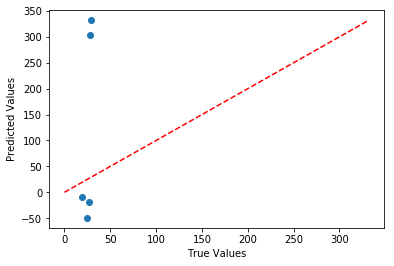

Result for  date_test_s0_p3
Next prediction is:  [235.52695261  91.72321425 187.6573807  111.26168385 157.04498425
 154.13562031]
MSE_pre:  12320.566555058098


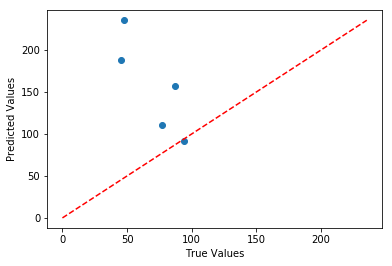

Result for  date_test_s1_p3
Next prediction is:  [ 66.74279133 111.938588    50.34862795   8.90164439  94.84786162
 146.3713646 ]
MSE_pre:  1865.2099994250602


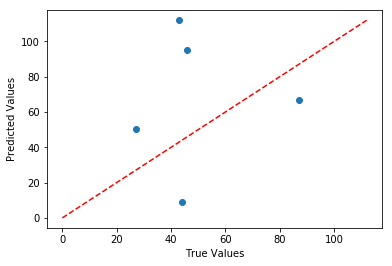

Result for  date_test_s2_p3
Next prediction is:  [ 87.24676112  56.86889674  68.2474802   66.74279133 111.938588
  50.34862795]
MSE_pre:  1112.006854190236


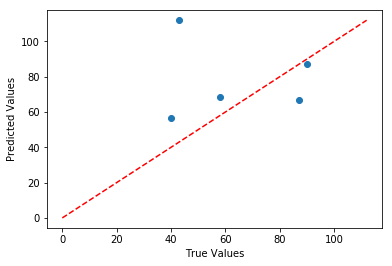

In [20]:
import statsmodels.api as sm

for i in range(3):
    X = date_df_out_win[i].iloc[:-1]
    y = date_df_out_win[i]['tot_num_tweets'][1:]
    X = np.nan_to_num(X)
    y = np.nan_to_num(y)

    results = sm.OLS(y, X).fit()

    # test data
    for k in range(3):
        j = i + 1
        file_name = 'date_test_s' + str(k) + '_p' + str(j)
        exec("X_test = %s" % file_name)
        exec("y_test = %s['tot_num_tweets'][1:]" % file_name)
    #         X_test = date_test_s0_p3
    #         y_test = date_test_s0_p3['tot_num_tweets'][1:]
        X_test = np.nan_to_num(X_test)
        y_test = np.nan_to_num(y_test)

        predictResult = results.predict(exog = X_test)
    #         print(predictResult)
        Next_result = predictResult
        predictResult = predictResult[:-1]
        MSE_pre = np.mean (np.square(predictResult - y_test))
        print('Result for ',file_name)
        print('Next prediction is: ',Next_result)
        print('MSE_pre: ', MSE_pre)
        plotPred(y_test,predictResult)


In [21]:
#-------------------------------------#
# end